<a href="https://colab.research.google.com/github/er-knight/using-python-for-research/blob/main/week-4-part-3/social-network-analysis/social-network-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [`networkx`](https://networkx.org/)

In [ ]:
import networkx as nx

G = nx.Graph()

In [ ]:
G.add_node(1) # add single node to the graph

In [ ]:
G.add_nodes_from([2, 3]) # add multiple node to the graph

In [ ]:
G.add_nodes_from(["u", "v"]) # add multiple nodes, with label as string

In [ ]:
G.nodes() # get nodes of the graph

NodeView((1, 2, 3, 'u', 'v'))

In [ ]:
G.add_edge(1, 2) # edge is added as pair of nodes

In [ ]:
G.add_edge("u", "v") # add an edge between node "u" and node "v"

In [ ]:
G.add_edges_from([(1, 3), (1, 4), (1, 5), (1, 6)]) # add multiple edges

In [ ]:
G.add_edge("u", "w") # if any node of the edge is not present, then it is added

In [ ]:
G.edges() # get edges present in the graph

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [ ]:
G.remove_node(2) # remove a node

In [ ]:
G.nodes() # node 2 has been removed

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

In [ ]:
G.remove_nodes_from([4, 5]) # remove multiple nodes

In [ ]:
G.nodes() # node 4 and 5 has been removed

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [ ]:
G.remove_edge(1, 3) # remove an edge from graph

In [ ]:
G.edges() # edge (1, 3) has been removed

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

In [ ]:
G.remove_edges_from([(1, 2), ("u", "v")]) # remove multiple edges from graph

In [ ]:
G.edges() # edges (1, 2) and ("u", "v") has been removed (edge (1, 2) is not present though)

EdgeView([(1, 6), ('u', 'w')])

In [ ]:
G.number_of_nodes() # get tota number of nodes in a graph

6

In [ ]:
G.nodes() # check which 6 nodes are present

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [ ]:
G.number_of_edges() # get tota number of edges in a graph

2

#### [`karate club graph`]()

- `networkx contains many types of random graph generators.`
- `In addition, it also contains a few empirical data sets.`
- `Let's use one of them called the karate club graph. In this network, the nodes represent members of a karate club and the edges correspond to friendships between the members.`

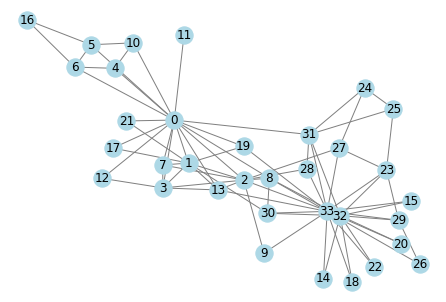

In [ ]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")

In [ ]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [ ]:
G.degree()[33] # degree of node 33

17

In [ ]:
G.degree(33) # another way to find degree of node 33

17

### [`random graphs`]() 

- `Erdős-Rényi (ER) random graph model`

In [ ]:
from scipy.stats import bernoulli

bernoulli.rvs(p=0.2) # p = probability of getting 1 (from sample space {0, 1})

0

In [ ]:
bernoulli.rvs(p=0.2)

0

In [ ]:
bernoulli.rvs(p=0.2)

1

In [ ]:
bernoulli.rvs(p=0.2)

0

In [ ]:
bernoulli.rvs(p=0.2)

0

In [ ]:
bernoulli.rvs(p=0.2)

1

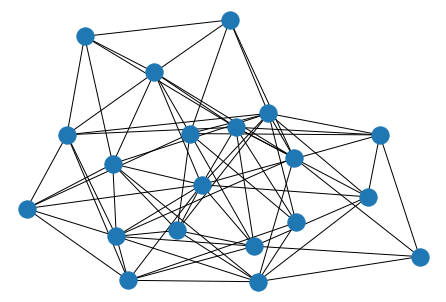

In [ ]:
n = 20 # number of nodes
p = 0.2 # probability that their is edge between 2 nodes

G = nx.Graph() # create empty graph
G.add_nodes_from(range(n)) # add n nodes to the graph 
for u in G.nodes():
    for v in G.nodes():
        if bernoulli.rvs(p=p):
            G.add_edge(u, v)

nx.draw(G)

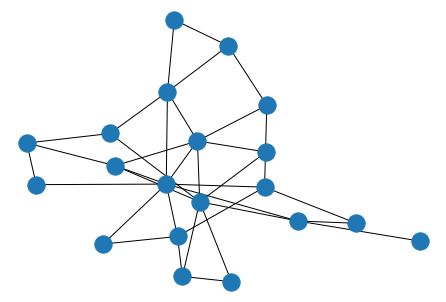

In [ ]:
n = 20 # number of nodes
p = 0.2 # probability that their is edge between 2 nodes

G = nx.Graph() # create empty graph
G.add_nodes_from(range(n)) # add n nodes to the graph 
for u in G.nodes():
    for v in G.nodes():
        if (u < v) and bernoulli.rvs(p=p): # (u < v) to avoid repeatation of pair of node
            G.add_edge(u, v)

nx.draw(G)

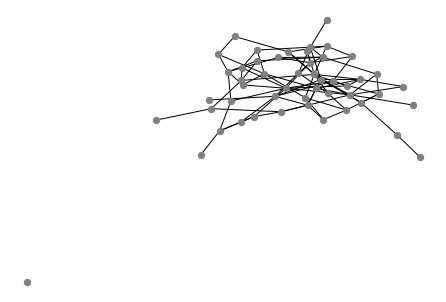

In [ ]:
def er_graph(n, p):
    """ generates an ER graph """
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for u in G.nodes():
        for v in G.nodes():
            if (u < v) and bernoulli.rvs(p=p):
                G.add_edge(u, v)

    return G

nx.draw(er_graph(50, 0.08), node_size=40, node_color="gray")

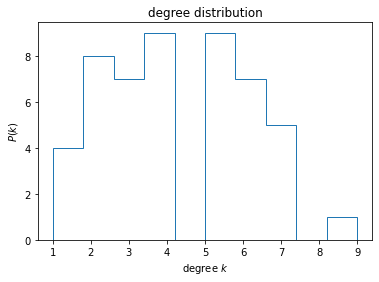

In [ ]:
def plot_degree_distribution(G):
    import matplotlib.pyplot as plt
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("degree distribution");

G = er_graph(50, 0.08) # graph with 50 nodes and probability of having edge between {u, v} is 0.08
plot_degree_distribution(G) # plot of degree of each node vs probability of edge between {u, v}

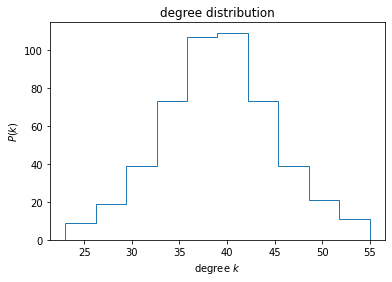

In [ ]:
G = er_graph(500, 0.08) # graph with 500 nodes and probability of having edge between {u, v} is 0.08
plot_degree_distribution(G) # plot of degree of each node vs probability of edge between {u, v}

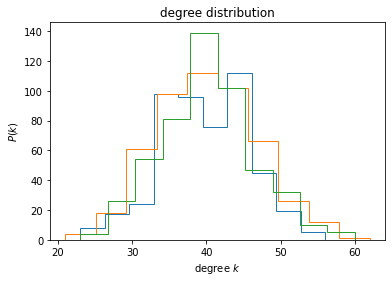

In [ ]:
G1 = er_graph(500, 0.08)
plot_degree_distribution(G1)
G2 = er_graph(500, 0.08)
plot_degree_distribution(G2)
G3 = er_graph(500, 0.08)
plot_degree_distribution(G3)

### [`descriptive statistics of social networks`]()

In [ ]:
import numpy as np 

# adjacency matrix of relations between people in villages
A1 = np.loadtxt("https://raw.githubusercontent.com/er-knight/using-python-for-research/main/week-4-part-3/social-network-analysis/village1.csv", delimiter=",")
A2 = np.loadtxt("https://raw.githubusercontent.com/er-knight/using-python-for-research/main/week-4-part-3/social-network-analysis/village2.csv", delimiter=",")

G1 = nx.to_networkx_graph(A1) # graph from adjacency matrix of village 1
G2 = nx.to_networkx_graph(A2) # graph from adjacency matrix of village 2

In [ ]:
def basic_net_stats(G):
    print(f"number of nodes : {G.number_of_nodes()}")
    print(f"number of edges : {G.number_of_edges()}")
    degrees = [d for n, d in G.degree()]
    print(f"average degree : {np.mean(degrees):.2f}")

basic_net_stats(G1)

number of nodes : 843
number of edges : 3405
average degree : 8.08


In [ ]:
basic_net_stats(G2)

number of nodes : 877
number of edges : 3063
average degree : 6.99


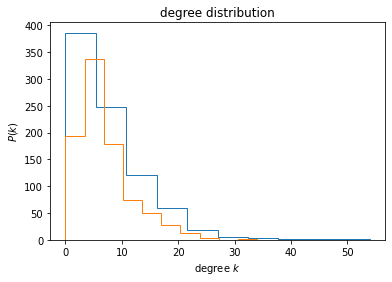

In [ ]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)

In [ ]:
nx.connected_components(G1) # generator of sets

<generator object connected_components at 0x7f7dd55917d0>

In [ ]:
components = (G1.subgraph(component) for component in nx.connected_components(G1))

type(components.__next__())

networkx.classes.graph.Graph

In [ ]:
component.number_of_nodes()

825

In [ ]:
len(component) # when len() used with grpah objects, it returns number of nodes

825

In [ ]:
G1_largest_connected_component = max((G1.subgraph(component) for component in nx.connected_components(G1)), key=len)
G2_largest_connected_component = max((G2.subgraph(component) for component in nx.connected_components(G2)), key=len)

In [ ]:
len(G1_largest_connected_component) # largest connected component in G1 has 825 nodes

825

In [ ]:
len(G2_largest_connected_component) # largest connected component in G2 has 810 nodes

810

In [ ]:
len(G1_largest_connected_component) / len(G1) # 97% of all of the nodes of graph G1 are contained in the largest connected component.

0.9786476868327402

In [ ]:
len(G2_largest_connected_component) / len(G2) # 92% of all of the nodes of graph G2 are contained in the largest connected component.

0.9236031927023945

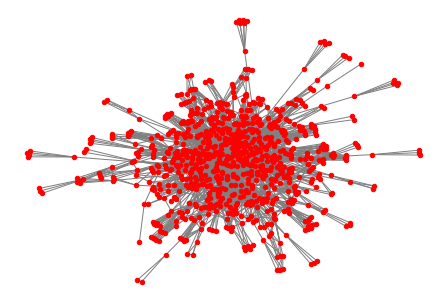

In [ ]:
# graph of largest connected component of graph G1

nx.draw(G1_largest_connected_component, node_color="red", edge_color="gray", node_size=20)

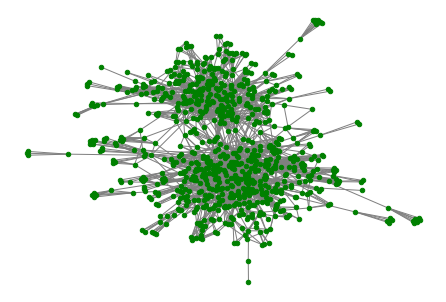

In [ ]:
# graph of largest connected component of graph G2

nx.draw(G2_largest_connected_component, node_color="green", edge_color="gray", node_size=20)